In [1]:
from pykin.utils import plot_utils as p_utils
from pytamp.action.pick import PickAction
from pytamp.action.place import PlaceAction
from pytamp.benchmark import Benchmark3

benchmark3 = Benchmark3(robot_name="doosan", geom="collision", is_pyplot=True)
pick = PickAction(
    benchmark3.scene_mngr, n_contacts=0, n_directions=0, retreat_distance=0.1
)
place = PlaceAction(
    benchmark3.scene_mngr, n_samples_held_obj=0, n_samples_support_obj=10
)

pick_actions = list(pick.get_possible_actions_level_1())

pnp_all_joint_path = []
pick_all_objects = []
place_all_object_poses = []

pnp_path = []
pick_objects = []
place_object_poses = []

success_joint_path = False
cnt = 0
for pick_action in pick_actions:
    for pick_scene in pick.get_possible_transitions(
        pick.scene_mngr.init_scene, action=pick_action
    ):
        pick_joint_path = pick.get_possible_joint_path_level_2(
            scene=pick_scene, grasp_poses=pick_scene.grasp_poses
        )
        if pick_joint_path:
            place_actions = list(place.get_possible_actions_level_1(pick_scene))
            for place_action in place_actions:
                for place_scene in place.get_possible_transitions(
                    scene=pick_scene, action=place_action
                ):
                    place_joint_path = place.get_possible_joint_path_level_2(
                        scene=place_scene,
                        release_poses=place_scene.release_poses,
                        init_thetas=pick_joint_path[-1][
                            place.move_data.MOVE_default_grasp
                        ][-1],
                    )
                    if place_joint_path:
                        success_joint_path = True
                        pnp_path += pick_joint_path + place_joint_path
                        pick_objects.append(pick_scene.robot.gripper.attached_obj_name)
                        place_object_poses.append(
                            place_scene.objs[place_scene.pick_obj_name].h_mat
                        )
                        break
                if success_joint_path:
                    break
        if success_joint_path:
            break
    if success_joint_path:
        break
pnp_all_joint_path.append(pnp_path)
pick_all_objects.append(pick_objects)
place_all_object_poses.append(place_object_poses)


*********************** Logical States ***********************
OrderedDict([('rect_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('rect_box1',
              {'on': Object(name=rect_box0, pos=[0.72       0.3        0.79119365])}),
             ('rect_box2',
              {'on': Object(name=rect_box1, pos=[0.72       0.3        0.86107828])}),
             ('square_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('square_box1',
              {'on': Object(name=square_box0, pos=[0.85       0.4        0.79125948])}),
             ('square_box2',
              {'on': Object(name=square_box1, pos=[0.85       0.4        0.86125948])}),
             ('goal_can',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73537763])}),
             ('milk1',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73537763])}),
             ('milk2',
              {'on': Object(name=clea

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


solve the problem using LM2!! 
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0070 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.641
WorkingTime[run]: 2.7580 sec

WorkingTime[run]: 0.0771 sec

WorkingTime[run]: 0.0789 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.657
WorkingTime[run]: 2.7096 sec

solve the problem using LM2!! 
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0053 sec

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/juju/anaconda3/envs/TAMP_39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_219177/3269580565.py", line 39, in <module>
    place_joint_path = place.get_possible_joint_path_level_2(
  File "/home/juju/anaconda3/envs/TAMP_39/lib/python3.9/site-packages/pytamp/action/place.py", line 188, in get_possible_joint_path_level_2
    pre_release_joint_path = self.get_rrt_star_path(
  File "/home/juju/anaconda3/envs/TAMP_39/lib/python3.9/site-packages/pytamp/action/activity.py", line 160, in get_rrt_star_path
    self.rrt_planner.run(
  File "/home/juju/anaconda3/envs/TAMP_39/lib/python3.9/site-packages/pykin/utils/kin_utils.py", line 76, in wrapper_fn
    result = original_fn(*args, **kwargs)
  File "/home/juju/anaconda3/envs/TAMP_39/lib/python3.9/site-packages/pytamp/planners/rrt_star_planner.py", line 177, in run
    if not self._co

PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1
Animation Finished..
Save finished..


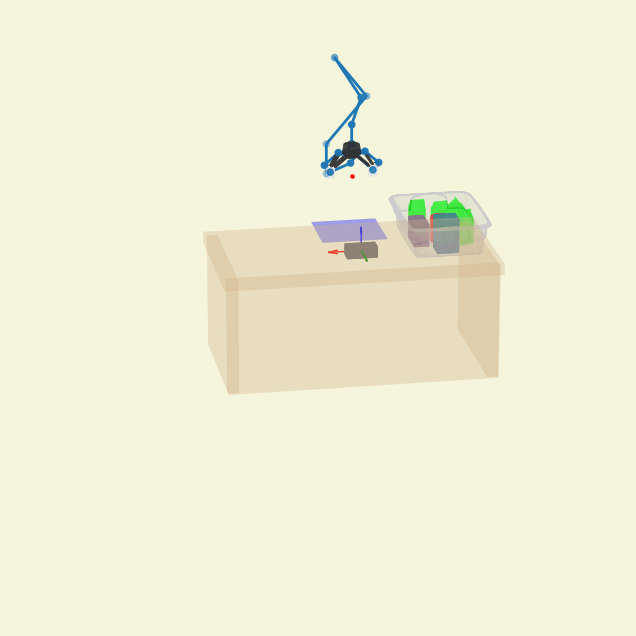

In [3]:
place.simulate_path(
    pnp_all_joint_path,
    pick_all_objects,
    place_all_object_poses,
    is_save=True,
    video_name="benchmark3_pnp_test"
)


In [2]:
c_list

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [1]:
import numpy as np
import argparse
import os

from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark3
from pytamp.search.mcts import MCTS

# #? python3 benchmark3_test.py --budgets 1000 --max_depth 20 --seed 3 --algo bai_ucb
parser = argparse.ArgumentParser(description="Test Benchmark 3.")
parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
parser.add_argument("--max_depth", metavar="H", type=int, default=20, help="Max depth")
parser.add_argument("--seed", metavar="i", type=int, default=2, help="A random seed")
parser.add_argument(
    "--algo",
    metavar="alg",
    type=str,
    default="bai_perturb",
    choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
    help="Choose one (bai_perturb, bai_ucb, uct)",
)
parser.add_argument(
    "--debug_mode",
    default=False,
    type=lambda x: (str(x).lower() == "true"),
    help="Debug mode",
)
try:
    args = parser.parse_args() #call from command line
except:
    args = parser.parse_args(args=[]) #call from notebook
    
debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

benchmark3 = Benchmark3(
    robot_name="doosan", geom="collision", is_pyplot=True,
)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)

c = c_list[5]


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-d06a53fa-6395-4692-9714-8d095b70dbc1.json


*********************** Logical States ***********************
OrderedDict([('rect_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('rect_box1',
              {'on': Object(name=rect_box0, pos=[0.72       0.3        0.79119365])}),
             ('rect_box2',
              {'on': Object(name=rect_box1, pos=[0.72       0.3        0.86107828])}),
             ('square_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('square_box1',
              {'on': Object(name=square_box0, pos=[0.85       0.4        0.79125948])}),
             ('square_box2',
              {'on': Object(name=square_box1, pos=[0.85       0.4        0.86125948])}),
             ('goal_can',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73537763])}),
             ('milk1',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73537763])}),
             ('milk2',
              {'on': Object(name=clea

In [2]:
c_list = c_list[6:]

In [3]:
mcts = MCTS(
    scene_mngr=benchmark3.scene_mngr,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c,
    debug_mode=debug_mode,
)
for i in range(budgets):
#     print(
#         f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark3.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
#     )
    mcts.do_planning(i)

final_level_1_values.append(mcts.values_for_level_1)
final_level_2_values.append(mcts.values_for_level_2)

if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(mcts.optimal_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)

else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])


=========== Search iteration : 1 ===========
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(True, {('right_inner_finger_pad', 'clearbox'), ('left_inner_finger_pad', 'square_box2')})


[Reward] S(6) -> A(8) -> S'(15) Reward : -1
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('left_inner_finger_pad', 'clearbox')})
(True, {('right_inner_finger_pad', 'clearbox'), ('left_inner_finger_pad', 'square_box2')})
(

[Reward] S(34) -> A(36) -> S'(43) Reward : -1
(True, {('right_inner_finger', 'goal_can'), ('collision_pad', 'clearbox'), ('right_inner_finger_pad', 'goal_can'), ('left_inner_finger_pad', 'clearbox'), ('left_inner_knuckle', 'clearbox'), ('left_outer_finger', 'clearbox')})
(True, {('right_inner_finger_pad', 'milk4'), ('right_inner_finger', 'milk4')})
(True, {('right_inner_finger', 'goal_can'), ('collision_pad', 'clearbox'), ('right_inner_finger_pad', 'goal_can'), ('left_inner_finger_pad', 'clearbox'), ('left_outer_finger', 'clearbox'), ('left_inner_knuckle', 'clearbox')})
(True, {('right_inner_finger_pad', 'milk4'), ('right_inner_finger', 'milk4')})
(True, {('right_inner_finger', 'goal_can'), ('collision_pad', 'clearbox'), ('right_inner_finger_pad', 'goal_can'), ('left_inner_finger_pad', 'clearbox'), ('left_inner_knuckle', 'clearbox'), ('left_outer_finger', 'clearbox')})
(True, {('right_inner_finger_pad', 'milk4'), ('right_inner_finger', 'milk4')})
(False, 'No object collided..')
(False,

[Reward] S(49) -> A(52) -> S'(57) Reward : -1
(True, {('right_inner_finger', 'goal_can'), ('collision_pad', 'clearbox'), ('right_inner_finger_pad', 'goal_can'), ('left_inner_finger_pad', 'clearbox'), ('left_outer_finger', 'clearbox'), ('left_inner_knuckle', 'clearbox')})
(True, {('right_inner_finger_pad', 'milk4'), ('right_inner_finger', 'milk4')})
(True, {('right_inner_finger', 'goal_can'), ('collision_pad', 'clearbox'), ('right_inner_finger_pad', 'goal_can'), ('left_inner_finger_pad', 'clearbox'), ('left_outer_finger', 'clearbox'), ('left_inner_knuckle', 'clearbox')})
(True, {('right_inner_finger_pad', 'milk4'), ('right_inner_finger', 'milk4')})
(True, {('right_inner_finger', 'goal_can'), ('collision_pad', 'clearbox'), ('right_inner_finger_pad', 'goal_can'), ('left_inner_finger_pad', 'clearbox'), ('left_inner_knuckle', 'clearbox'), ('left_outer_finger', 'clearbox')})
(True, {('right_inner_finger_pad', 'milk4'), ('right_inner_finger', 'milk4')})
(False, 'No object collided..')
(False,

(True, {('right_inner_finger_pad', 'clearbox'), ('right_inner_finger', 'clearbox'), ('milk2', 'rect_box2')})
(True, {('milk2', 'rect_box2')})
(True, {('milk2', 'rect_box2')})
(True, {('milk2', 'square_box2')})
(True, {('milk2', 'square_box2')})
(True, {('milk2', 'square_box2')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(True, {('milk2', 'tray_blue')})
(True, {('milk2', 'tray_blue')})
(True, {('milk2', 'tray_blue')})
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No o

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


[Reward] S(117) -> A(118) -> S'(121) Reward : 2
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
(False, 'No object collided..')
[Action] Place goal_can on tray_blue
[Reward] S(121) -> A(122) -> S'(125) Reward : -1
Success!!!!!
Terminal State! Reward is 10
Action Node: 4 Action: Pick milk3
Action Node: 8  Action: Place milk3 on table
Action Node: 30 Action: Pick rect_box2
Action Node: 36  Action: Place rect_box2 on table
Action Node: 47 Action: Pick milk1
Action Node: 52  Action: Place milk1 on table
Action Node: 74 Action: Pick square_box2
Action Node: 79  Action: Place square_box2 on table
Action Node: 89 Action: Pick milk2
Action Node: 93  Action: Place milk2 on table
Action Node: 109 Action: Pick square_box1
Action Node: 113  Action: Place square_box1 on table
Action Node: 118 A

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.52
WorkingTime[run]: 2.8239 sec

WorkingTime[run]: 0.0788 sec

WorkingTime[run]: 0.0909 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.561
WorkingTime[run]: 2.8626 sec

place milk3 on table
solve the problem using LM2!! 
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0067 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000005
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.607
WorkingTime[run]: 2.8168 sec

WorkingTime[run]: 0.0820 sec

WorkingTime[run]: 0.0771 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.586
WorkingTime[run]: 2.8871 sec

Success pnp
pick rect_box2
solve the problem using LM2!! 
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.603
WorkingTime[run]: 2.5728 sec

WorkingTime[run]: 0.0784 sec

WorkingTime[run]: 0.0836 sec




KeyboardInterrupt



In [4]:

if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(mcts.optimal_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
    

In [5]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([ 0.02357999,  0.05324578,  2.0292088 , -0.01114952,  1.05548761,
                          0.03009851]),
                  array([ 0.04715998,  0.10649156,  1.96402251, -0.02229904,  1.06377768,
                          0.06019703]),
                  array([ 0.07073997,  0.15973734,  1.89883621, -0.03344856,  1.07206774,
                          0.09029554]),
                  array([ 0.09431997,  0.21298311,  1.83364991, -0.04459808,  1.08035781,
                          0.12039406]),
                  array([ 0.11789996,  0.26622889,  1.76846361, -0.0557476 ,  1.08864787,
                          0.15049257]),
                  array([ 0.14147995,  0.31947467,  1.70327732, -0.06689712,  1.09693793,
                          0.18059108]),
                  array([ 0.16505994,  0.37272045,  1.63809102, -0.07804664,  1.105228  ,
                          0.2106896 ]),
                  array([ 0.18863993,  0.42596623,  1.572904

100 pnp_joint_path!
200 pnp_joint_path!
300 pnp_joint_path!
400 pnp_joint_path!
500 pnp_joint_path!
600 pnp_joint_path!
700 pnp_joint_path!
800 pnp_joint_path!
900 pnp_joint_path!
1000 pnp_joint_path!
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1
Animation Finished..
Save finished..


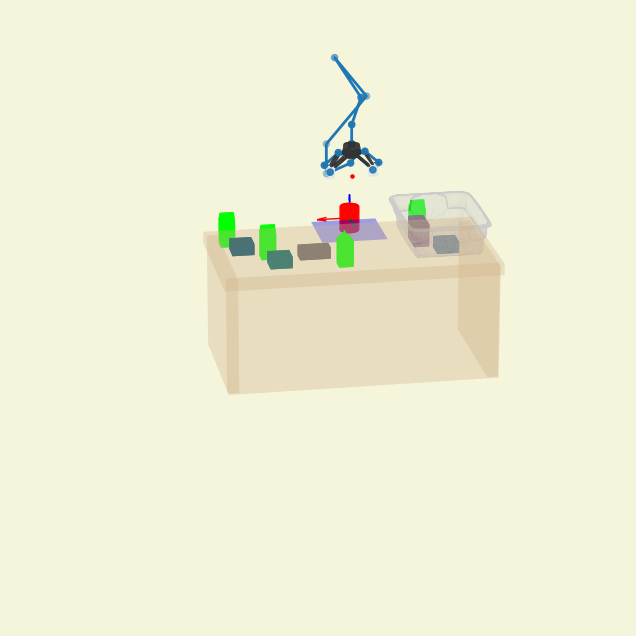

In [6]:
mcts.place_action.simulate_path(
    final_pnp_all_joint_paths[0],
    pick_all_objects,
    place_all_object_poses,
    is_save=True,
    video_name="MCTS_Benchamrk3_pytamp_jh",
)


In [14]:
place_all_object_poses[0]

[array([[ 9.99999973e-01,  2.30372276e-04, -5.55111512e-16,
          9.04814158e-01],
        [-2.30372276e-04,  9.99999973e-01, -1.57209315e-18,
         -4.13413837e-01],
        [ 5.27355937e-16,  1.68051337e-18,  1.00000000e+00,
          8.23434152e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[-9.99999984e-01, -1.76974488e-04, -6.66133815e-16,
          6.25911128e-01],
        [ 1.76974488e-04, -9.99999984e-01,  2.27682456e-18,
         -2.56086796e-01],
        [-6.93889390e-16,  2.11419424e-18,  1.00000000e+00,
          7.70299977e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 2.03673204e-04, -9.99999979e-01,  7.15572621e-14,
          5.35368534e-01],
        [ 9.99999979e-01,  2.03673204e-04,  1.43041774e-13,
         -5.15268482e-01],
        [-1.43056357e-13,  7.15281241e-14,  1.00000000e+00,
          7.70234152e-01],
        [ 0.00000000e+00,  0.00000000e+

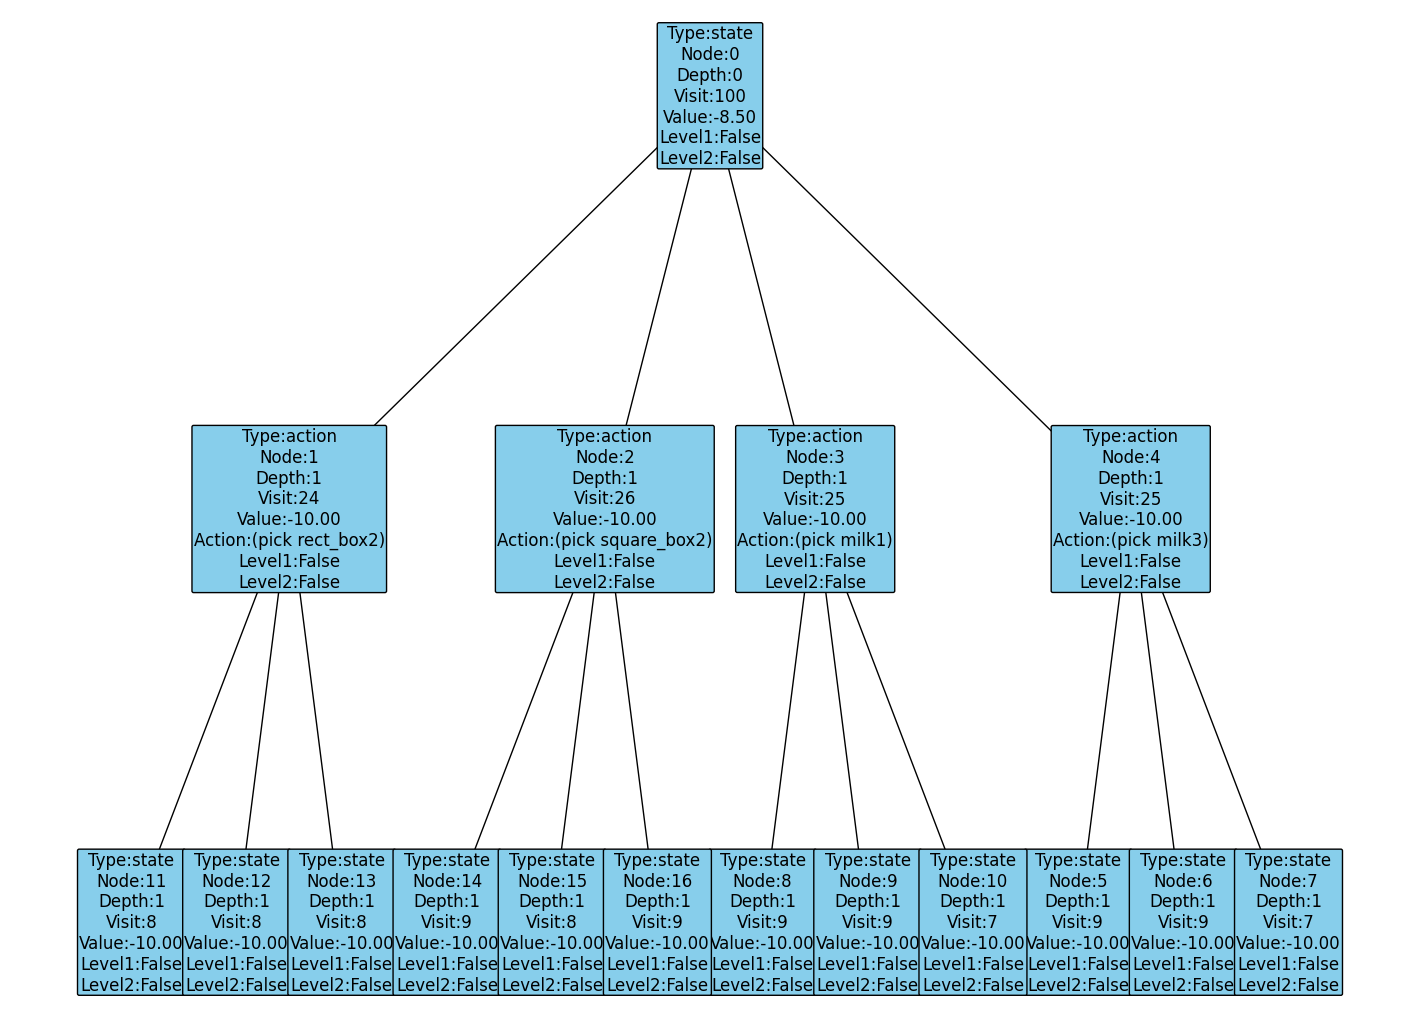

In [11]:
mcts.visualize_tree("Siccess nodes", mcts.tree)